In [19]:
from patchify import patchify
import tifffile as tif
import pandas as pd
import matplotlib.pyplot as plt

### Read csv file

In [5]:
df = pd.read_csv('../../datasets/ADDA/tiff/training_csv.csv')

In [6]:
df.head()

,subject_id,dataset,ct_path,pet_path,label_path
0,MDA-020.tiff,source,../datasets/ADDA/tiff/images/MDA-020__CT.tiff,../datasets/ADDA/tiff/images/MDA-020__PT.tiff,../datasets/ADDA/tiff/labels/MDA-020.tiff
1,MDA-054.tiff,source,../datasets/ADDA/tiff/images/MDA-054__CT.tiff,../datasets/ADDA/tiff/images/MDA-054__PT.tiff,../datasets/ADDA/tiff/labels/MDA-054.tiff
2,MDA-201.tiff,source,../datasets/ADDA/tiff/images/MDA-201__CT.tiff,../datasets/ADDA/tiff/images/MDA-201__PT.tiff,../datasets/ADDA/tiff/labels/MDA-201.tiff
3,MDA-184.tiff,source,../datasets/ADDA/tiff/images/MDA-184__CT.tiff,../datasets/ADDA/tiff/images/MDA-184__PT.tiff,../datasets/ADDA/tiff/labels/MDA-184.tiff
4,MDA-065.tiff,source,../datasets/ADDA/tiff/images/MDA-065__CT.tiff,../datasets/ADDA/tiff/images/MDA-065__PT.tiff,../datasets/ADDA/tiff/labels/MDA-065.tiff


fix the path to the images

In [9]:
df['ct_path'] = df['ct_path'].apply(lambda x: '../'+x)
df['pet_path'] = df['pet_path'].apply(lambda x: '../'+x)
df['label_path'] = df['label_path'].apply(lambda x: '../'+x)

In [10]:
df.head()

,subject_id,dataset,ct_path,pet_path,label_path
0,MDA-020.tiff,source,../../datasets/ADDA/tiff/images/MDA-020__CT.tiff,../../datasets/ADDA/tiff/images/MDA-020__PT.tiff,../../datasets/ADDA/tiff/labels/MDA-020.tiff
1,MDA-054.tiff,source,../../datasets/ADDA/tiff/images/MDA-054__CT.tiff,../../datasets/ADDA/tiff/images/MDA-054__PT.tiff,../../datasets/ADDA/tiff/labels/MDA-054.tiff
2,MDA-201.tiff,source,../../datasets/ADDA/tiff/images/MDA-201__CT.tiff,../../datasets/ADDA/tiff/images/MDA-201__PT.tiff,../../datasets/ADDA/tiff/labels/MDA-201.tiff
3,MDA-184.tiff,source,../../datasets/ADDA/tiff/images/MDA-184__CT.tiff,../../datasets/ADDA/tiff/images/MDA-184__PT.tiff,../../datasets/ADDA/tiff/labels/MDA-184.tiff
4,MDA-065.tiff,source,../../datasets/ADDA/tiff/images/MDA-065__CT.tiff,../../datasets/ADDA/tiff/images/MDA-065__PT.tiff,../../datasets/ADDA/tiff/labels/MDA-065.tiff


## read the first ct image 

In [17]:
# Specify the path to your TIFF file
ct_p = df.iloc[0]['ct_path']
pt_p = df.iloc[0]['pet_path']
lbl_p = df.iloc[0]['label_path']

# Read the TIFF file
ct_image = tif.imread(ct_p)
pt_image = tif.imread(pt_p)
lbl_image = tif.imread(lbl_p)

print(ct_image.shape)  # Print the shape of the image to confirm it's been read correctly
print(pt_image.shape)
print(lbl_image.shape)

(500, 500, 100)
(500, 500, 100)
(500, 500, 100)


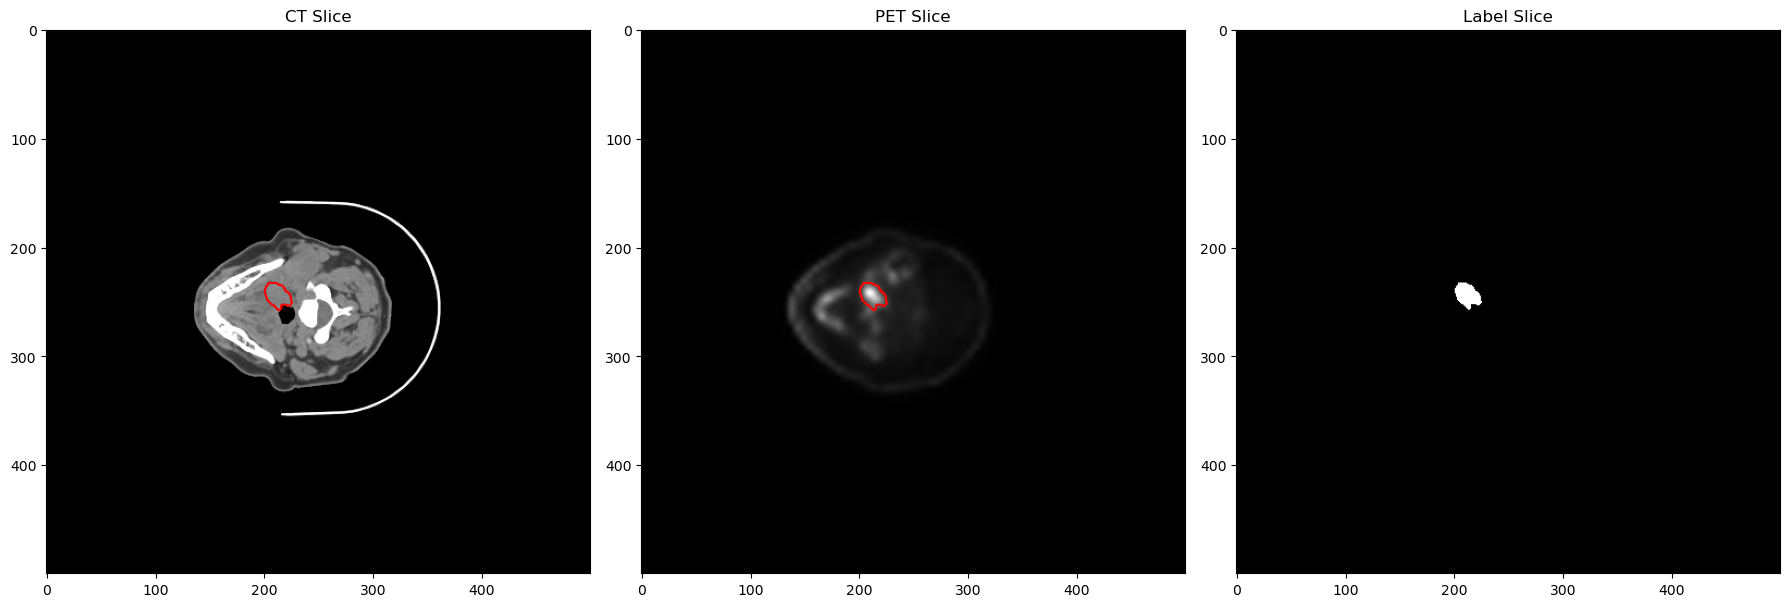

In [21]:
# Choose a slice index, for example, the middle slice
slice_index = 50  # Adjust based on your specific needs

# Extract the slices
ct_slice = ct_image[:, :, slice_index]  # Assuming the batch size is 1
pet_slice = pt_image[:, :, slice_index]
label_slice = lbl_image[:, :, slice_index]

# Visualization
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
axes[0].imshow(ct_slice, cmap='gray')
axes[0].contour(label_slice, colors='red')
axes[0].set_title('CT Slice')
axes[1].imshow(pet_slice, cmap='gray')
axes[1].contour(label_slice, colors='red')
axes[1].set_title('PET Slice')
axes[2].imshow(label_slice, cmap='gray')
axes[2].set_title('Label Slice')

# for ax in axes:
#     ax.axis('off')

plt.tight_layout()
plt.show()

### Patchify the image

In [88]:
# Specify the patch size you want, e.g., (64, 64) for 2D patches or (64, 64, 64) for 3D patches
# patch_size = (64, 64)  # For 2D images
patch_size = (32, 32, 32)  # Uncomment this for 3D volumetric data

# Use patchify to extract patches
ct_patches = patchify(ct_image, patch_size, step=patch_size)  # step=patch_size for non-overlapping patches
pt_patches = patchify(pt_image, patch_size, step=patch_size)  # step=patch_size for non-overlapping patches
lbl_patches = patchify(lbl_image, patch_size, step=patch_size)  # step=patch_size for non-overlapping patches

# patches will have an additional dimension in the beginning for the number of patches extracted
print(ct_patches.shape)
print(pt_patches.shape)
print(lbl_patches.shape)

(15, 15, 3, 32, 32, 32)
(15, 15, 3, 32, 32, 32)
(15, 15, 3, 32, 32, 32)


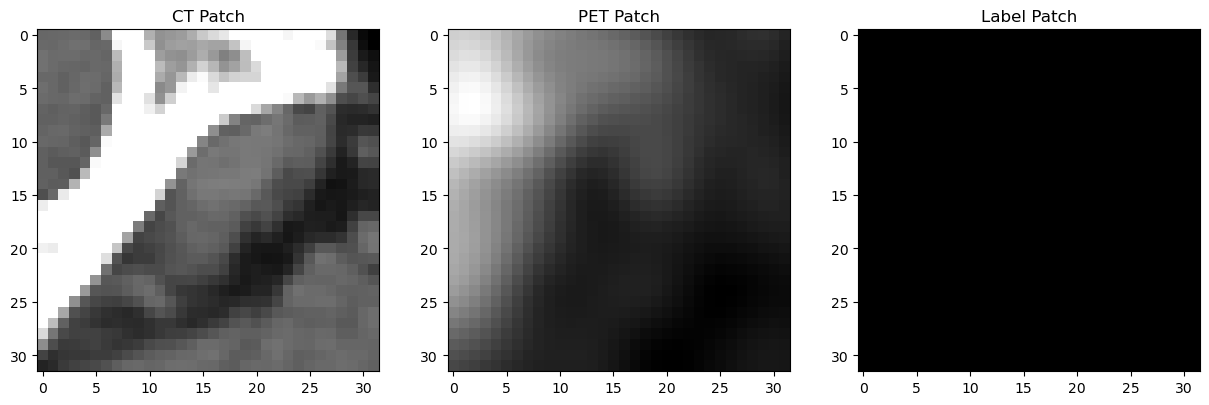

In [89]:
slice_idx = 8
patch_idx = 8
patch_idy = 8
patch_idz = 2
# Assuming ct_patches, pet_patches, and label_patches are your arrays with the specified dimensions
# Let's pick the first patch (0,0,0) and the middle slice (slice number 32) for visualization

ct_patch = ct_patches[patch_idx, patch_idy, patch_idz, :, :, slice_idx]
pet_patch = pt_patches[patch_idx, patch_idy, patch_idz, :, :, slice_idx]
label_patch = lbl_patches[patch_idx, patch_idy, patch_idz, :, :, slice_idx]

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(ct_patch, cmap='gray')
axes[0].set_title('CT Patch')

axes[1].imshow(pet_patch, cmap='gray')
axes[1].set_title('PET Patch')

axes[2].imshow(label_patch, cmap='gray')
axes[2].set_title('Label Patch')

# for ax in axes:
#     ax.axis('off')  # Hide axes for clarity

plt.show()


### Save tiff stack

In [90]:
df.columns

Index(['subject_id', 'dataset', 'ct_path', 'pet_path', 'label_path'], dtype='object')

In [96]:
subject_id = []
dataset = []
ct_path = []
pet_path = []
label_path = []

In [97]:
for i in range(ct_patches.shape[0]):  # Loop over the first dimension
    for j in range(ct_patches.shape[1]):  # Loop over the second dimension
        for k in range(patches.shape[2]):
            patch = ct_patches[i, j, k]  # Selecting the patch, ignoring the singleton dimension
            subject_id.append('MDA-020.tiff')
            dataset.append('source')
            ct_path.append(f'../datasets/ADDA/tiff_patches/images/MDA-020__CT_{i}_{j}_{k}.tiff')
            
            filename = f'../../datasets/ADDA/tiff_patches/images/MDA-020__CT_{i}_{j}_{k}.tiff'  # Creating a filename for the patch
            tif.imwrite(filename, patch)
            # ../../datasets/ADDA/tiff_patchees/images/MDA-020__CT.tiff

In [98]:
# For PET patches
for i in range(pt_patches.shape[0]):
    for j in range(pt_patches.shape[1]):
        for k in range(patches.shape[2]):
            patch = pt_patches[i, j, k]
            pet_path.append(f'../datasets/ADDA/tiff_patches/images/MDA-020__PT_{i}_{j}_{k}.tiff')
            filename = f'../../datasets/ADDA/tiff_patches/images/MDA-020__PT_{i}_{j}_{k}.tiff'
            tif.imwrite(filename, patch)

# For Label patches
for i in range(lbl_patches.shape[0]):
    for j in range(lbl_patches.shape[1]):
        for k in range(patches.shape[2]):
            patch = lbl_patches[i, j, k]
            label_path.append(f'../datasets/ADDA/tiff_patches/labels/MDA-020_{i}_{j}_{k}.tiff')
            filename = f'../../datasets/ADDA/tiff_patches/labels/MDA-020_{i}_{j}_{k}.tiff'
            tif.imwrite(filename, patch)


In [99]:
train_csv = pd.DataFrame({
    'subject_id':subject_id, 
    'dataset':dataset, 
    'ct_path':ct_path, 
    'pet_path':pet_path, 
    'label_path':label_path
})

In [100]:
train_csv.shape

(225, 5)

In [101]:
train_csv.to_csv('../../datasets/ADDA/tiff_patches/training_file.csv', index=False)